# 56-59. Titanic号のデータを解析する

データはココ：[https://www.kaggle.com/c/titanic/data](https://www.kaggle.com/c/titanic/data)

In [1]:
import pandas as pd
from pandas import Series, DataFrame

In [2]:
titanic_df = pd.read_csv('train.csv')
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# データの概要
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


このデータから有用な知見を得るために、明確な目標があったほうがいい。
いくつか、具体的な問いを設定してみる。

```
1.) タイタニック号の乗客はどのような人たちだったのか？
2.) それぞれの乗客はどのデッキにいたか？ また、それは客室の種類とどのような関係にあったか？
3.) 乗客は主にどこから来たのか？
4.) 家族連れか、単身者か？
```

これらの基本的な問いのあとに、さらに深くデータ解析を進める。

```
5.) 沈没からの生還者には、どのような要因があったのか？
```

### 1.) タイタニック号の乗客はどのような人たちだったのか？

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

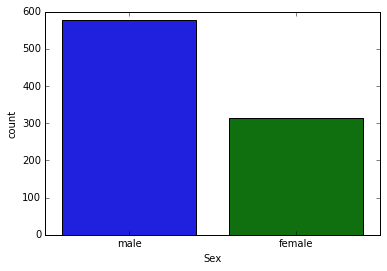

In [5]:
# まずは性別チェック
sns.countplot('Sex', data = titanic_df)

男性が多い。

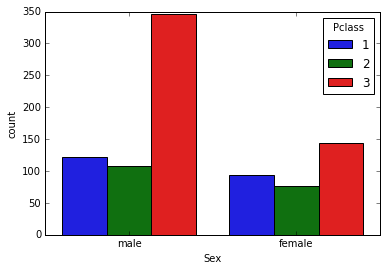

In [6]:
# 乗客の性別を客室で層別化する
sns.countplot('Sex', data = titanic_df, hue = 'Pclass')

class3が多い。

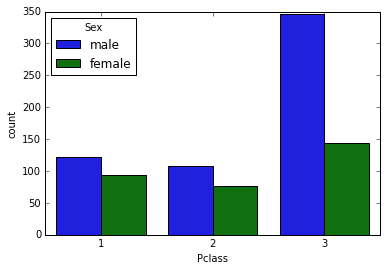

In [7]:
# 今度は、乗客の客室を性別で層別化する。
sns.countplot('Pclass', data = titanic_df, hue = 'Sex')

3等客室は女性に比べて、男性が圧倒的に多いことがわかる。
子供という概念を導入して、さらに客層を調べる。

In [8]:
# 16歳未満を子供とする。
# レクチャー45で学んだ知識を用いる。

def male_female_child(passenger):
    # 年齢と性別のデータを取得する
    age, sex= passenger
    # 年齢を調べて、16歳未満なら子供、それ以外は性別をそのまま返す
    if age < 16:
        return 'child'
    else:
        return sex

# personという新しい列を追加
titanic_df['person'] = titanic_df[['Age', 'Sex']].apply(male_female_child, axis = 1)

In [9]:
# 最初の10行を確認
titanic_df[0:10]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,male
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,male
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,child
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,female
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,child


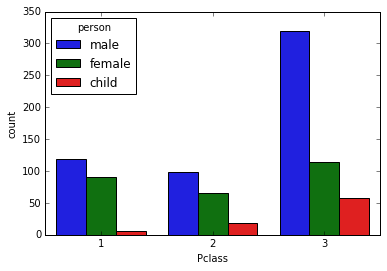

In [10]:
# 再び、客室の種類別で人数を数える
sns.countplot('Pclass', data = titanic_df, hue ='person')

3等客室にはたくさんの子供がいたのに、1等客室にはほとんどいない。

年齢に関する分布をもう少し詳しく見る。

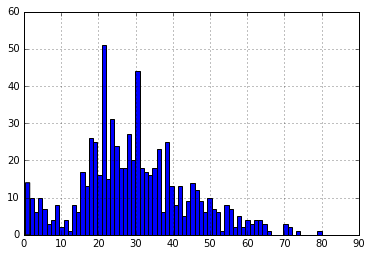

In [11]:
# pandasで簡単にヒストグラムを描く方法
titanic_df['Age'].hist(bins = 70)

In [12]:
titanic_df['Age'].mean()

29.69911764705882

In [13]:
# 数の小計をだすことも可能
titanic_df['person'].value_counts()

male      537
female    271
child      83
Name: person, dtype: int64

------

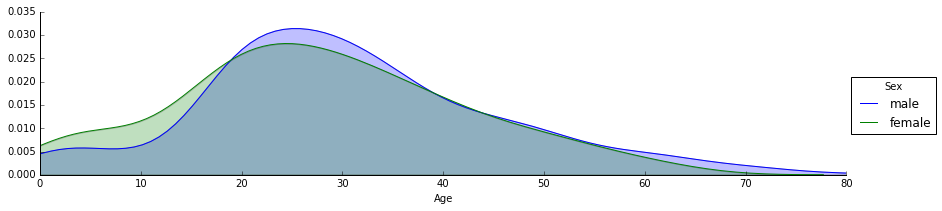

In [14]:
# FacetGridを使うと、複数のカーネル密度推定のグラフを1つのプロットに描くことができる

# 性別で層別化して、グラフを少し横長に設定する
fig = sns.FacetGrid(titanic_df, hue = "Sex", aspect = 4)

# mapを使って、性別ごとにkdeplotを描くようにする（横軸）
fig.map(sns.kdeplot, 'Age', shade = True)

# xの最大値を長老に合わせる
oldest = titanic_df['Age'].max()

# x軸の範囲を設定
fig.set(xlim = (0, oldest))

# 凡例を付けておく
fig.add_legend()

男女の年齢分布は、大きくは変わらないが子供は女の子が多い。

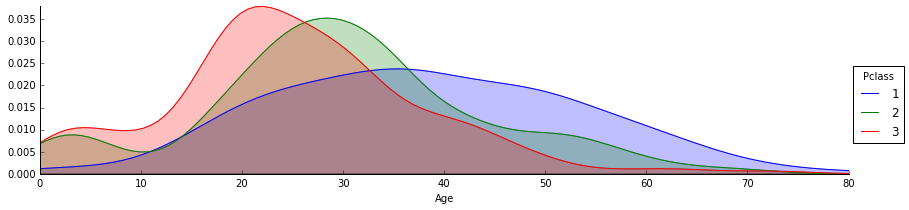

In [15]:
# person列について同じことをやれば、子供も含めたKDE plotが描ける
fig = sns.FacetGrid(titanic_df, hue = "Pclass", aspect = 4)
fig.map(sns.kdeplot, 'Age', shade = True)
oldest = titanic_df['Age'].max()
fig.set(xlim = (0, oldest))
fig.add_legend()

若い（小さい）人ほど客室の等級が低い。

性別、年齢、客室の種類など、乗客の全体像がよくわかってきた。

### 2.) それぞれの乗客はどのデッキにいたか？ また、それは客室の種類とどのような関係にあったか？

In [16]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


Cabinという列がそれぞれの乗客がいた場所だが、NaN値があるので、まずはこれを除去する。

In [17]:
# NaNを消して、deckという新しいオブジェクトを作成する
deck = titanic_df['Cabin'].dropna()

In [18]:
deck.head()

1      C85
3     C123
6      E46
10      G6
11    C103
Name: Cabin, dtype: object

実は、最初の1文字だけあれば、どこにいたのかわかる。

In [19]:
# シンプルに、for文で取り出す。

levels = []

# 1文字目を取り出す
for level in deck:
    levels.append(level[0])

In [20]:
levels[0:5]

['C', 'C', 'E', 'G', 'C']

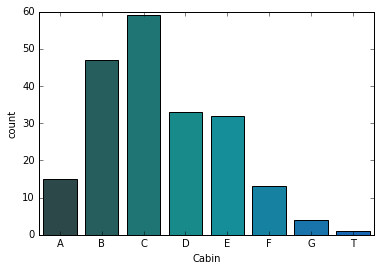

In [21]:
# DataFrameを作って、プロットする
cabin_df = DataFrame(levels)
cabin_df.columns = ['Cabin']
cabin_df.head()
sns.countplot('Cabin', data = cabin_df, palette = 'winter_d', order = sorted(set(levels)))

Tだけ離れているので、おそらく間違ったデータ。

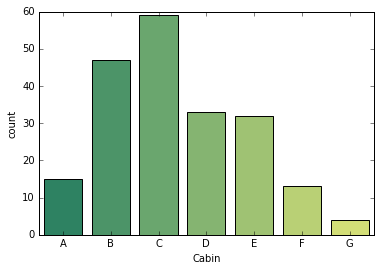

In [22]:
# T以外のデータだけから新しくDataFrameを作る
cabin_df = cabin_df[cabin_df.Cabin != 'T']
sns.countplot('Cabin', data=cabin_df, palette='summer', order=sorted(set(cabin_df['Cabin'])))

乗客がいた場所ごとの解析が出来た。引き続き、3つ目の質問に応えていく。

### 3.) 乗客は主にどこから来たのか？

In [23]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


乗船した場所を示す、"Embarked"列には、C, Q, Sという値が入っている。
（Cherbourg, Queenstown, Southhampton）

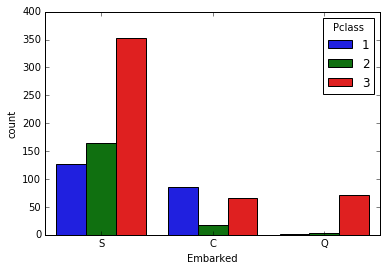

In [24]:
# orderで順番を指定できる
sns.countplot('Embarked', data = titanic_df, hue = 'Pclass')

In [25]:
# 実はNaNがある
from collections import Counter
Counter(titanic_df.Embarked)

Counter({'S': 644, nan: 2, 'C': 168, 'Q': 77})

In [26]:
titanic_df.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

Queenstownからの乗客のほとんどが、3等客室。これは、当時のこの地域の経済が余り良くなかった事を反映しているのかもしれない。

-----

### 4.) 家族連れか、単身者か？

In [27]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


In [28]:
# 単身者かどうかを表す新しい列を追加する。

# 親子、兄弟姉妹を示す列を足し合わせる
titanic_df['Alone'] = titanic_df.Parch + titanic_df.SibSp

In [29]:
titanic_df['Alone']

0       1
1       1
2       0
3       1
4       0
5       0
6       0
7       4
8       2
9       1
10      2
11      0
12      0
13      6
14      0
15      0
16      5
17      0
18      1
19      0
20      0
21      0
22      0
23      0
24      4
25      6
26      0
27      5
28      0
29      0
       ..
861     1
862     0
863    10
864     0
865     0
866     1
867     0
868     0
869     2
870     0
871     2
872     0
873     0
874     1
875     0
876     0
877     0
878     0
879     1
880     1
881     0
882     0
883     0
884     0
885     5
886     0
887     0
888     3
889     0
890     0
Name: Alone, dtype: int64

Alone列が0でなければ、その乗客は誰かと一緒に乗船したということがわかる。

1人（Alone）と家族と（With Family）に分ける。

In [30]:
# 数字を、文字列に変換する
titanic_df['Alone'].loc[titanic_df['Alone'] > 0] = 'With Family'
titanic_df['Alone'].loc[titanic_df['Alone'] == 0] = 'Alone'

/Users/kymatsum/.pyenv/versions/anaconda3-4.0.0/lib/python3.5/site-packages/pandas/core/indexing.py:128: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [31]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,With Family
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,With Family
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,With Family
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,Alone


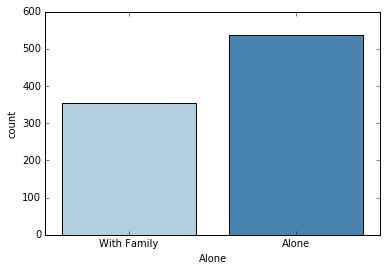

In [32]:
# とりあえず描画
sns.countplot('Alone', data = titanic_df, palette = 'Blues')

-----

### 5.) 沈没からの生還者には、どのような要因があったのか？

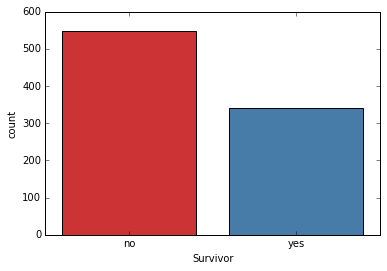

In [33]:
# Survivorという新しい列を作る
titanic_df["Survivor"] = titanic_df.Survived.map({0: "no", 1:"yes"})

sns.countplot('Survivor', data = titanic_df, palette = 'Set1')

かなり多くの人々が犠牲になっているのがわかる。客室の種類は関係あるか？映画Titanicで言われているように、3等客室の乗客への扱いが不当に悪かったかどうかを見てみる。

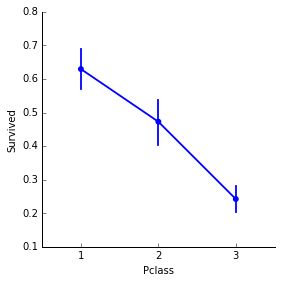

In [34]:
# こういった解析にはfactorplotが便利。
sns.factorplot('Pclass', 'Survived', data = titanic_df, order = [1, 2, 3])

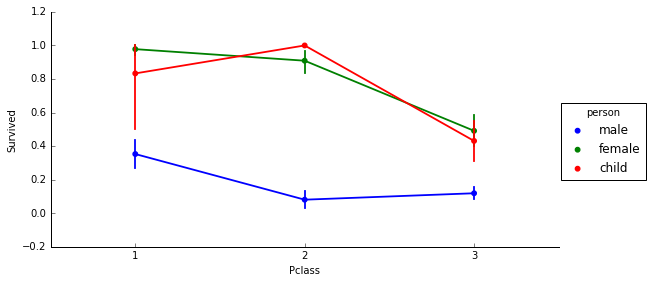

In [35]:
sns.factorplot('Pclass', 'Survived', hue = 'person', data = titanic_df, order = [1, 2, 3], aspect = 2)

3等客室の乗客の生存率はかなり低いことが分かる。
ただし、これは3等客室に男性が多い、つまり、「女性と子供を先に」というポリシーの犠牲になったのかもれない。
これを調べるために、もう少し詳しく見ていく。

年齢はどうか？

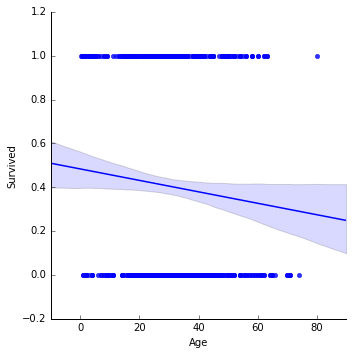

In [52]:
# 年齢と生存率のグラフを描く
sns.lmplot('Age', 'Survived', data = titanic_df)

年齢が上がるに連れて生存率が下がっているのが分かる。
ここに、客室の情報を加える。

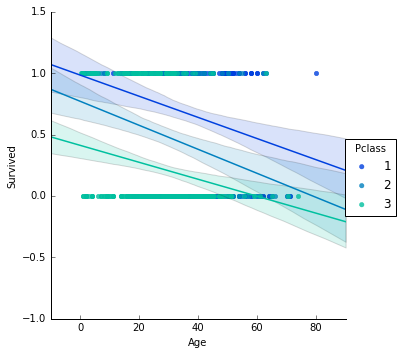

In [53]:
# 客室の種類で層別化する
sns.lmplot('Age', 'Survived', hue = 'Pclass', data = titanic_df, palette = 'winter', hue_order = [1, 2, 3])

x_binsを使うと、少し見やすくできる。

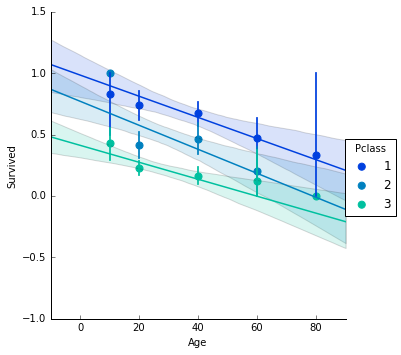

In [54]:
# ポイントを決めて、標準偏差を追記できる
generations = [10, 20, 40, 60, 80]
sns.lmplot('Age', 'Survived', hue = 'Pclass', data = titanic_df, palette = 'winter', x_bins = generations, hue_order = [1, 2, 3])

1等客室に、歳をとった偉い人が居た可能性がある。 性別と年齢の関係も見てみる。

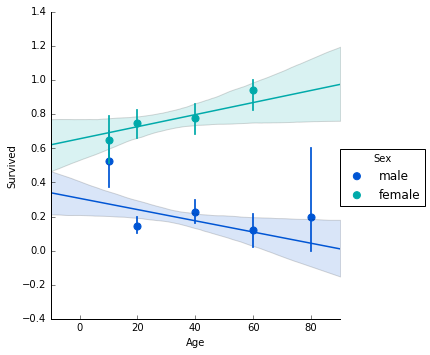

In [56]:
sns.lmplot('Age', 'Survived', hue = 'Sex', data = titanic_df, palette = 'winter', x_bins = generations)

性別、年齢、客室の等級が、生存率にどう影響するのかデータを可視化することができた。

-----

追加：
```
6.) 乗客が居たデッキは生存率と関係あるか？また、その答えは感覚的な答えと合うだろうか？
7.) 家族連れであることは、事故からの生還率を上げているだろうか？
```